# ATI-Scale Evaluation

## Imports

In [1]:
import csv
%matplotlib inline
from pylab import *
rcParams['figure.figsize'] = (16,9)
rcParams['font.size'] = 12
import numpy as np
import scipy as sp
import os
import glob
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import math
import pingouin as pg

## Data Acquisition

In [2]:
data_path = os.getcwd() + "/log"
data_extension = "csv"
os.chdir(data_path)
data_files = glob.glob('*.{}'.format(data_extension))

In [3]:
tmp = [pd.read_csv(filename, index_col=None, header=0) for filename in data_files]
df = pd.concat(tmp, axis=0, ignore_index=True)

## Functions

In [4]:
def plot_atiplot(headers, data_items, data_means, title):
    sns.set(style="darkgrid")
    
    f, (ax_box_items, ax_box) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [0.90, 0.10]})

    sns.boxplot(data=pd.DataFrame({"ATI Mean Scores": data_means["ati_means"]}), ax=ax_box)
    data_means_scatter = [d for d in data_means["ati_means"]]
    sns.scatterplot(data=pd.DataFrame(data_means_scatter).T, ax=ax_box, palette=["y" for i in range(len(data_means_scatter))], markers=["o" for i in range(len(data_means_scatter))], x_jitter=True, legend=None)
    sns.boxplot(data=data_items, palette=["b" for i in range(len(data_items))], ax=ax_box_items)
    
    ax_box.axes.set_ylim(0, 7)
    ax_box.set_ylabel("")
    ax_box_items.set_xlabel(title)
    ax_box_items.set_ylabel("ATI Item Scores")
    ax_box_items.axes.set_ylim(0, 7)

def range_mean_median_sd(header, data):
    data = list(data)    
    print(f"{header} ranges from {min(data)} to {max(data)} with a mean of {np.mean(data)} (sd. {sp.stats.tstd(data)}) and median of {np.median(data)}.")
        
def cronbach_alpha(df):
    df_ca = df.drop(["pid", "ati_means"], axis=1)
    a, conf_interval = pg.cronbach_alpha(data=df_ca)
    conf_interval = [conf_interval[0], conf_interval[1]]
    
    quality_of_survey = "\u001b[32mEXCELLENT\x1b[0m" if a >= 0.9 else "\u001b[32mGOOD\x1b[0m" if a >= 0.8 else "\u001b[32mACCEPTABLE\x1b[0m" if a >= 0.7 else "\u001b[31mQUESTIONABLE\x1b[0m" if a >= 0.6 else "\u001b[31mPOOR\x1b[0m" if a >= 0.5 else "\u001b[31mINSUFFICIENT\x1b[0m" 
    
    print(f"Confidence Interval: {conf_interval}")
    print(f"Cronbach's Alpha: {a}")
    print(f"Interpretation of Quality of Survey, according to Cripps, B. (2017):\nPsychometric testing: Critical perspectives")
    print(f"{quality_of_survey}" + " ({:.2f})".format(a))

## Evaluation

### Quality of Survey (Cronbach's Alpha)

In [5]:
cronbach_alpha(df)

Confidence Interval: [-3.21, 0.92]
Cronbach's Alpha: -0.13138686131386895
Interpretation of Quality of Survey, according to Cripps, B. (2017):
Psychometric testing: Critical perspectives
INSUFFICIENT (-0.13)


### Evaluation ATI Item Scores and ATI Mean Scores

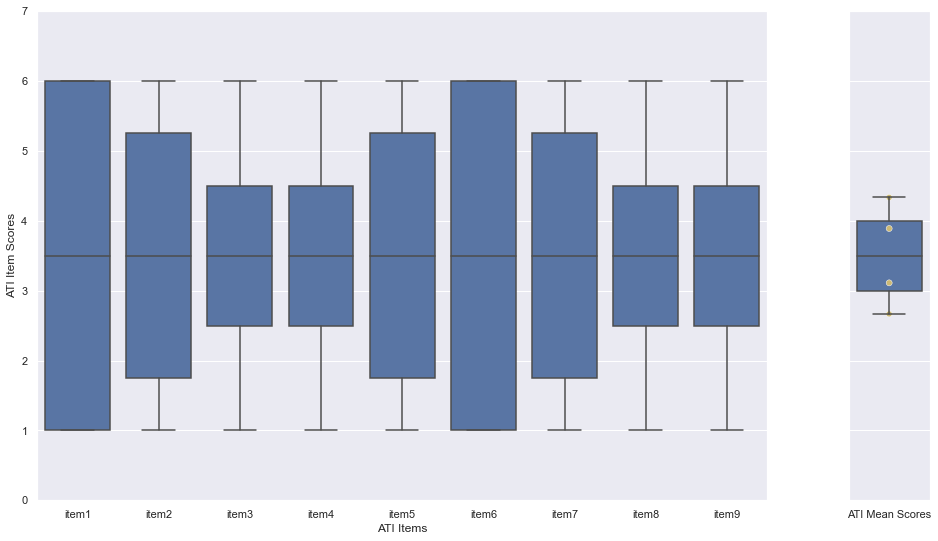

In [6]:
plot_atiplot(df.drop(["pid", "ati_means"], axis=1).columns, df.drop(["pid", "ati_means"], axis=1), pd.DataFrame(df["ati_means"]), "ATI Items")

In [7]:
range_mean_median_sd("ATI Means", df["ati_means"])

ATI Means ranges from 2.6666666666666665 to 4.333333333333333 with a mean of 3.5 (sd. 0.7508568493597515) and median of 3.5.
